#                                                           DRUG PREDICTING MODEL  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("drug200.csv")
data.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
143,74,M,HIGH,NORMAL,15.436,DrugY
45,66,F,NORMAL,NORMAL,8.107,drugX
41,58,F,HIGH,NORMAL,14.239,drugB
146,37,F,LOW,NORMAL,12.006,drugX
78,19,F,HIGH,HIGH,13.313,drugA
161,57,F,HIGH,NORMAL,9.945,drugB
159,34,F,LOW,NORMAL,12.923,drugX
69,18,F,HIGH,NORMAL,24.276,DrugY
140,49,M,HIGH,NORMAL,6.269,drugA
185,57,F,NORMAL,NORMAL,25.893,DrugY


# Adding a new feature

In [3]:
data['Na_to_K_ratio'] = data['Na_to_K'] / data['Age']

# Encoding the values

In [4]:
L_C = LabelEncoder()
data['Sex'] = L_C.fit_transform(data['Sex'])
data['BP'] = L_C.fit_transform(data['BP'])
data['Cholesterol'] = L_C.fit_transform(data['Cholesterol'])

# Defining features of (X) and target (y)

In [5]:
X = data.drop(columns=['Drug'])
Y = data['Drug']

# Train-test split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalize the features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree model

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation

In [9]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

In [10]:
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 1.00
Confusion Matrix:
 [[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]
Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



# Visualization

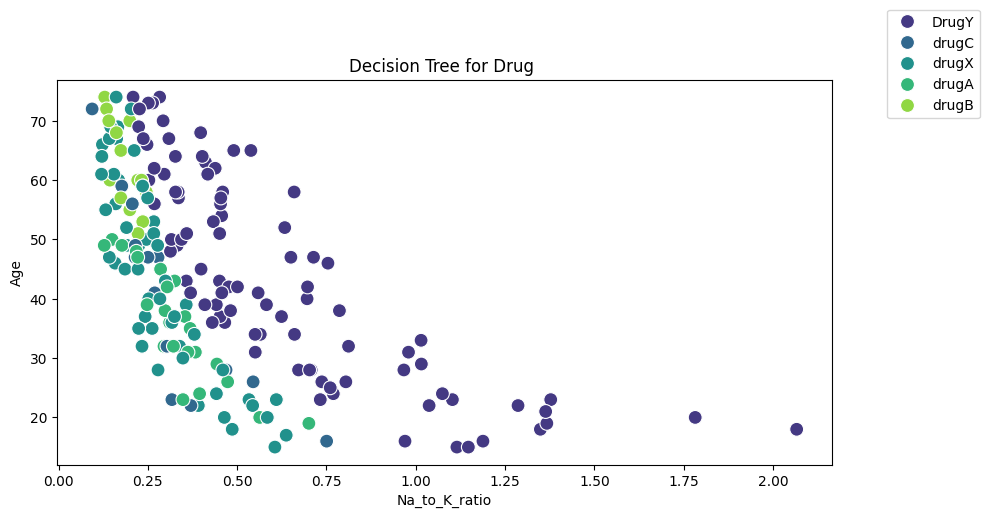

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Na_to_K_ratio', y='Age', hue=Y, palette="viridis", s=100)
plt.title("Decision Tree for Drug ")
plt.xlabel("Na_to_K_ratio")
plt.ylabel("Age")
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.4, 0.2, 0.8))
plt.show()

# Plotting pie chart

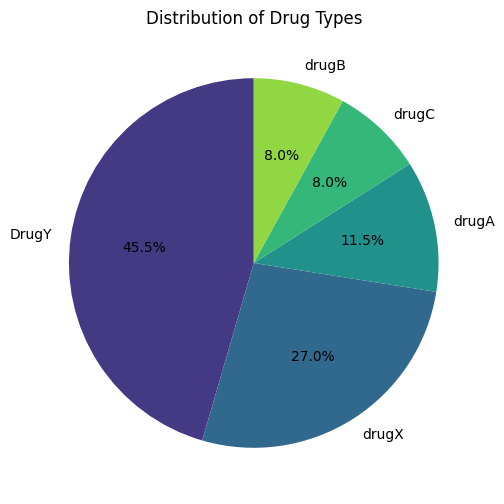

In [12]:
plt.figure(figsize=(6, 6))
Y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(Y.unique())))
plt.title("Distribution of Drug Types")
plt.ylabel('')
plt.show()

# Plotting confusion matrix

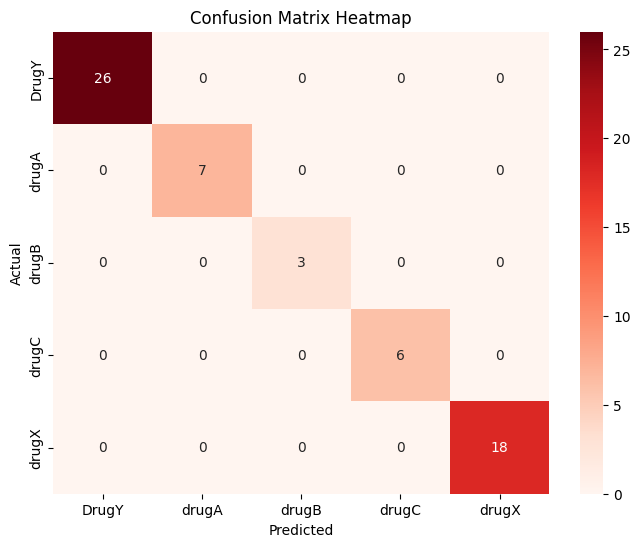

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# User Input

In [14]:
def predicting_drug(data, model):
    p = model.predict(data)
    P_C = p[0]
    return P_C

user_age = float(input("Enter your Age: "))
user_na_to_k = float(input("Enter your Na_to_K Ratio: "))
user_sex = int(input("Enter your Sex (0 for Female, 1 for Male): "))
user_bp = int(input("Enter your Blood Pressure (0 for LOW, 1 for NORMAL, 2 for HIGH): "))
user_cholesterol = int(input("Enter your Cholesterol (0 for NORMAL, 1 for HIGH): "))


Enter your Age:  15
Enter your Na_to_K Ratio:  22
Enter your Sex (0 for Female, 1 for Male):  1
Enter your Blood Pressure (0 for LOW, 1 for NORMAL, 2 for HIGH):  1
Enter your Cholesterol (0 for NORMAL, 1 for HIGH):  1


# Calculating the Na_to_K_ratio and taking Input data

In [15]:
user_na_to_k_ratio = user_na_to_k / user_age

user_data = np.array([[user_age, user_sex, user_bp, user_cholesterol, user_na_to_k, user_na_to_k_ratio]])
user_data = scaler.transform(user_data)
predicted_drug = predicting_drug(user_data, model)

# Predicting the Drug 

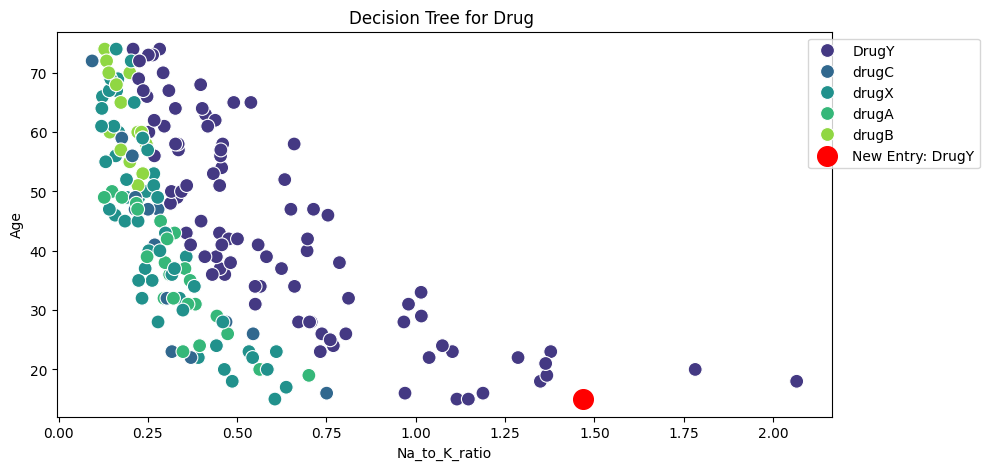

User Age = 15.0 | Na_to_K Ratio = 22.0 | Predicted Drug = DrugY


In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Na_to_K_ratio', y='Age', hue=Y, palette="viridis", s=100)
plt.scatter(user_na_to_k_ratio, user_age, color='red', s=200, label=f'New Entry: {predicted_drug}')
plt.title("Decision Tree for Drug ")
plt.xlabel("Na_to_K_ratio")
plt.ylabel("Age")
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.2, 0.2, 0.8))
plt.show()

print(f"User Age = {user_age} | Na_to_K Ratio = {user_na_to_k} | Predicted Drug = {predicted_drug}")